In [1]:
%matplotlib notebook
from app import *
import ipywidgets as wg

app = JupyterSMV()
app.geojson()

<IPython.core.display.Javascript object>


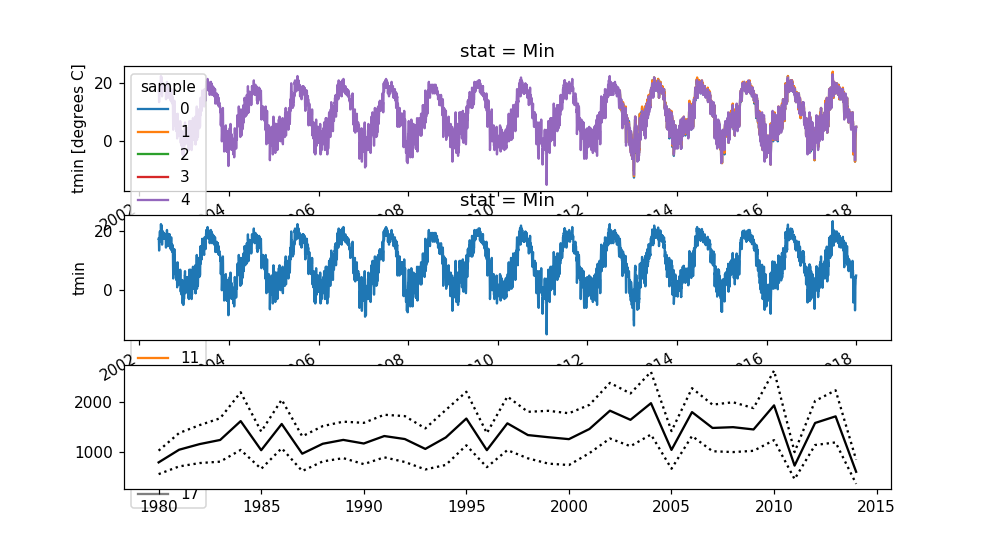

interactive(children=(Dropdown(description='Dataset', options=('AirMOSS_L2_3_surface', 'AirMOSS_L2_3_rootzone'…

<IPython.core.display.Javascript object>


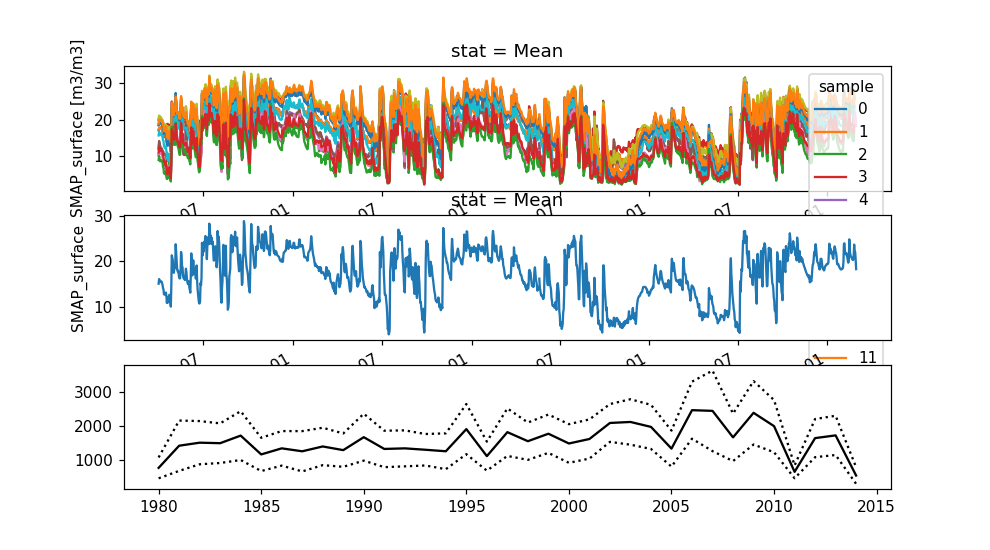

interactive(children=(Dropdown(description='Dataset', options=('SMAP_surface', 'SMAP_rootzone', 'NEE_mean', 'G…

In [2]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [9, 5]

app.ui

# testing

In [ ]:
app.layers

In [ ]:
lyr = app.layers.iloc[1]
lyr

In [ ]:
# getting active samples -------------------------------------------------------------------------

def get_active_samples(layer):
    on = []
    for sample in layer.samples.samp:
        print(sample.on)
        if sample.on:
            on.append(sample.id)
    return(on)

# getting plottable variables --------------------------------------------------------------------

allnan = lambda v: np.count_nonzero(~np.isnan(v.data))==0
ignorevars = ["time","stat","sample","lat","lon"]

def get_plottable_variables(layer):
    plotvars = []
    for v in list(layer.xr.variables):
        if v not in ignorevars:
            if not allnan(layer.xr[v]):
                plotvars.append(v)
    return(plotvars)

# test --------------------------------------------------------------------
get_plottable_variables(lyr)
get_active_samples(lyr)

In [ ]:
%matplotlib notebook

def init_plotter(layer):

    xds = layer.xr
    plotvars = get_plottable_variables(layer)
    fig, axs = plt.subplots(3,1)

    # USFS dataset  --------------------------------------------------------------------

    mean = lyr.layer.stats.GPP_mean
    std = lyr.layer.stats.GPP_std

    mean.plot(color="black", ax=axs[2])
    (mean-std).plot(color="black", ls=":", ax=axs[2])
    (mean+std).plot(color="black", ls=":", ax=axs[2])

    # SMV dataset ----------------------------------------------------------------------

    def update(Dataset, Statistic):
        """ """
        Samples = get_active_samples(layer)
        selection = dict(stat=Statistic, sample=Samples)

        axs[0].clear(); axs[1].clear()                                            # clear axes 1 and 2
        xds[Dataset].sel(selection).plot.line(x='time', ax=axs[0])
        xds[Dataset].sel(selection).mean("sample").plot.line(x='time', ax=axs[1])

        fig.canvas.draw()

    widgets = dict(Dataset=plotvars, Statistic=["Mean","Min","Max"])
    p = wg.interactive(update, **widgets);
    display(p)

In [ ]:


    # def get_on_lyrs(self, column=None):
    #     """Returns a subset (or column) of layers df, only "on" layers."""

    #     on = []
    #     for ix, row in self.layers.iterrows():
    #         if row["layer"].on:
    #             on.append(ix)
    #     df = self.layers.iloc[on][column] if column else self.layers.iloc[on]

    #     return(df)

    # def update_output(self):
    #    out.clear_output()
    #    with out:
    #        print(site_details.format(**lo.site))


    # for ix, row in layers.iterrows():              # loop over samples col
    #     active = get_active_samples(row)
    #     selxr = row.xr.sel(sample=active)
    #     selxrs.append(selxr)

    # plotvars = get_plottable_variables(layer)